In [405]:
# http://random-walks.org/content/misc/rff/rff.html

# linear regression with design matrix

In [406]:
# lets do a simple linear regression example with
# a design matrix Phi
# This might be replaced with a design matrix based on
# Random Fourier Features later

In [407]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import numpy as np

<Figure size 432x288 with 0 Axes>

In [408]:
X_train = np.random.random(10)[:,np.newaxis]
noise_train = np.random.normal(scale=0.1, size=X_train.shape)
y_train = X_train + noise_train

X_fine = np.linspace(0,1,10)

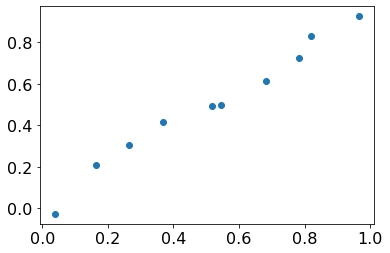

In [409]:
plt.plot(X_train, y_train, 'o')

In [410]:
# the model is
# y = b0 + b1*X + epsilon

In [411]:
def create_design_matrix(X):
    # Phi is the design matrix where the columns are the features

    feat_1 = np.ones(X.shape)
    feat_2 = X.copy()

    Phi = np.column_stack((feat_1, feat_2))
    
    return Phi

In [412]:
Phi = create_design_matrix(X_train)

In [413]:
Phi.shape

(10, 2)

https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

We solve the linear system of equations

$$
y = \Phi \hat b
$$

In [414]:
bhat = np.linalg.lstsq(Phi, y_train, rcond=None)[0]

In [415]:
# bhat[0] = y-intercept
# bhat[1] = gradient

In [416]:
bhat

array([[0.01117903],
       [0.94734225]])

In [417]:
# can also solve it using this method
# bhat = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(y_train)

In [418]:
Phi_fine = create_design_matrix(X_fine)

In [419]:
Phi_fine.shape

(10, 2)

In [420]:
bhat.shape

(2, 1)

In [421]:
yhat = Phi_fine@bhat

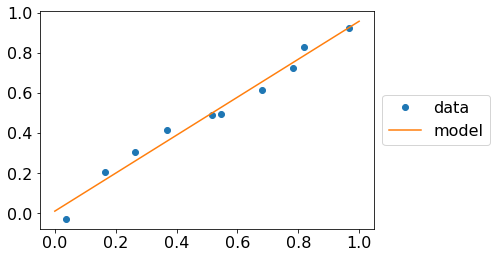

In [422]:
plt.plot(X_train, y_train, 'o', label='data')
plt.plot(X_fine, yhat, '-', label='model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# what about a design matrix made of random fourier features?

In [423]:
X_train = np.random.random(100)[:,np.newaxis]
noise_train = np.random.normal(scale=0.1, size=X_train.shape)
# y_train = X_train + noise_train
y_train = np.cos(2*np.pi*X_train) + noise_train

X_fine = np.linspace(0, 1, 1000)[:,np.newaxis]

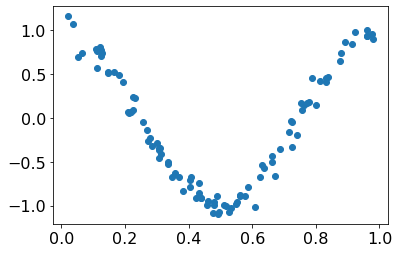

In [424]:
plt.plot(X_train, y_train, 'o')

In [425]:
n_rff=100
w_sigma=0.1

In [426]:
    def _get_rffs(self, X, return_vars):
        """Return random Fourier features based on data X, as well as random
        variables W and b.
        """
        N, D = X.shape
        if self.W_ is not None:
            W, b = self.W_, self.b_
        else:
            W = np.random.normal(loc=0, scale=1, size=(self.rff_dim, D))
            b = np.random.uniform(0, 2*np.pi, size=self.rff_dim)

        B    = np.repeat(b[:, np.newaxis], N, axis=1)
        norm = 1./ np.sqrt(self.rff_dim)
        Z    = norm * np.sqrt(2) * np.cos(self.sigma * W @ X.T + B)

        if return_vars:
            return Z, W, b
        return Z

In [427]:
def create_rff_design_matrix(X, n_rff, w_sigma, return_vars, w=None, b=None):
    if w is None:
        w = np.random.normal(0, w_sigma, size=(X.shape[1], n_rff))
        # w = np.ones(shape=(X.shape[1], n_rff))
        b = np.random.uniform(0, 2*np.pi, size=(X.shape[1], n_rff))

    Phi = np.cos(np.dot(X, w)*2*np.pi + b)
    # Phi = np.cos(np.dot(X, w)*2*np.pi)
    if return_vars:
        return Phi, w, b
    else:
        return Phi

In [428]:
Phi_rff, w, b = create_rff_design_matrix(X_train, n_rff, w_sigma, return_vars=True, w=None, b=None)

In [429]:
w.shape

(1, 100)

In [430]:
b.shape

(1, 100)

In [431]:
bhat_rff = np.linalg.lstsq(Phi_rff, y_train, rcond=None)[0]

# lamb=1
# n_col=Phi_rff.shape[1]
# bhat_rff = np.linalg.lstsq(Phi_rff + lamb * np.identity(n_col), y_train, rcond=None)[0]

 

In [432]:
bhat_rff[:10]

array([[-9.56578838e+07],
       [-2.09114164e+09],
       [ 2.47890713e+09],
       [ 3.27258317e+09],
       [-2.75540215e+09],
       [-1.36103481e+09],
       [-2.71087159e+09],
       [ 5.63267669e+09],
       [-2.32405863e+09],
       [-7.83577187e+08]])

In [433]:
Phi_rff_fine = create_rff_design_matrix(X_fine, n_rff, w_sigma, return_vars=False, w=w, b=b)

In [434]:
# Phi_rff.shape
Phi_rff_fine.shape

(1000, 100)

In [435]:
# Phi_rff

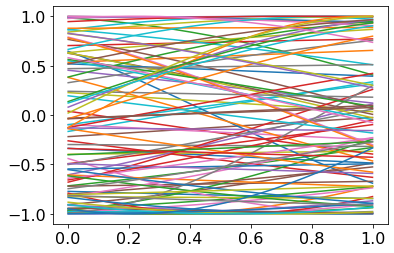

In [436]:
plt.plot(X_fine, Phi_rff_fine, '-');

In [437]:
yhat = Phi_rff_fine@bhat_rff

(-1.5, 1.5)

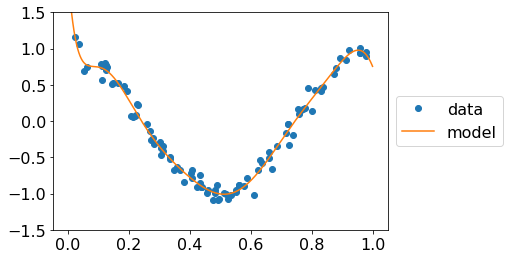

In [438]:
plt.plot(X_train, y_train, 'o', label='data')
plt.plot(X_fine, yhat, '-', label='model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1.5,1.5)

# comparing

In [439]:
# http://gregorygundersen.com/blog/2019/12/23/random-fourier-features/
# https://github.com/gwgundersen/random-fourier-features/blob/master/fit_rffridge.py

In [440]:
from   sklearn.gaussian_process.kernels import RBF
from   sklearn.kernel_ridge import KernelRidge


# N     = 100
# X     = np.linspace(-10, 10, N)[:, None]
# mean  = np.zeros(N)
# cov   = RBF()(X.reshape(N, -1))
# y     = np.random.multivariate_normal(mean, cov)
# noise = np.random.normal(0, 0.5, N)
# y    += noise

# y = y[:,np.newaxis]

In [441]:
X = X_train.copy()
y = y_train.copy()

In [442]:

# Finer resolution for smoother curve visualization.
# X_test = np.linspace(-10, 10, N*2)[:, None]
X_test = np.linspace(0, 1, N*2)[:, None]

In [443]:

# Fit kernel ridege regression using an RBF kernel.
clf    = KernelRidge(kernel=RBF(0.1))
clf    = clf.fit(X, y)
y_pred = clf.predict(X_test)

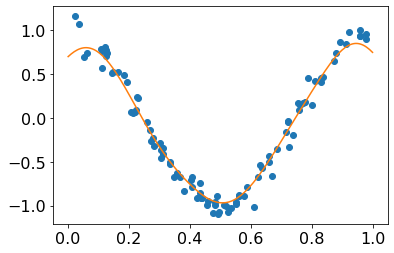

In [444]:
plt.plot(X, y, 'o')
plt.plot(X_test, y_pred)

In [445]:

import numpy as np
from   sklearn.exceptions import NotFittedError
from   sklearn.linear_model import Ridge


# -----------------------------------------------------------------------------

class RFFRidgeRegression:

    def __init__(self, rff_dim=1, alpha=1.0, sigma=1.0):
        """Kernel ridge regression using random Fourier features.
        rff_dim : Dimension of random feature.
        alpha :   Regularization strength. Should be a positive float.
        """
        self.fitted  = False
        self.rff_dim = rff_dim
        self.sigma   = sigma
        self.lm      = Ridge(alpha=alpha)
        self.b_      = None
        self.W_      = None

    def fit(self, X, y):
        """Fit model with training data X and target y.
        """
        Z, W, b = self._get_rffs(X, return_vars=True)
        self.lm.fit(Z.T, y)
        self.b_ = b
        self.W_ = W
        self.fitted = True
        return self

    def predict(self, X):
        """Predict using fitted model and testing data X.
        """
        if not self.fitted:
            msg = "Call 'fit' with appropriate arguments first."
            raise NotFittedError(msg)
        Z = self._get_rffs(X, return_vars=False)
        return self.lm.predict(Z.T)

    def _get_rffs(self, X, return_vars):
        """Return random Fourier features based on data X, as well as random
        variables W and b.
        """
        N, D = X.shape
        if self.W_ is not None:
            W, b = self.W_, self.b_
        else:
            W = np.random.normal(loc=0, scale=1, size=(self.rff_dim, D))
            b = np.random.uniform(0, 2*np.pi, size=self.rff_dim)

        B    = np.repeat(b[:, np.newaxis], N, axis=1)
        norm = 1./ np.sqrt(self.rff_dim)
        Z    = norm * np.sqrt(2) * np.cos(self.sigma * W @ X.T + B)

        if return_vars:
            return Z, W, b
        return Z

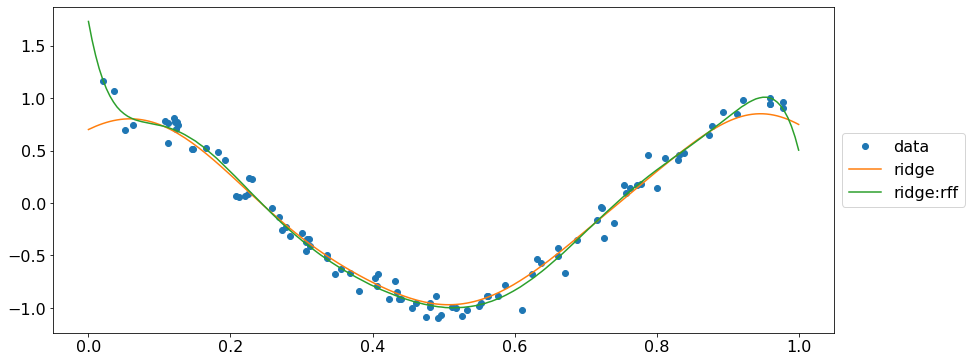

In [446]:
# Fit kernel ridge regression using random Fourier features.
rff_dim = 10
clf     = RFFRidgeRegression(rff_dim=rff_dim, alpha=0)
clf.fit(X, y)
y_pred_rff  = clf.predict(X_test)

plt.figure(figsize=(14, 6))
plt.plot(X, y, 'o', label='data')
plt.plot(X_test, y_pred, label='ridge')
plt.plot(X_test, y_pred_rff, label='ridge:rff')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [447]:
PHI_RFF = clf._get_rffs(X, False)

In [448]:
PHI_RFF.shape

(10, 100)

In [449]:
clf.lm.coef_

array([[-8.46471200e+12, -1.08716114e+08,  2.05875288e+12,
        -3.88676391e+09,  1.46601462e+12,  1.07272990e+12,
         4.33494645e+11,  2.07612794e+12,  6.95146452e+06,
        -6.60380468e+12]])

In [450]:
PHI_RFF.shape

(10, 100)

In [451]:
y.shape

(100, 1)

In [452]:
# plt.plot(X, PHI_RFF.T);

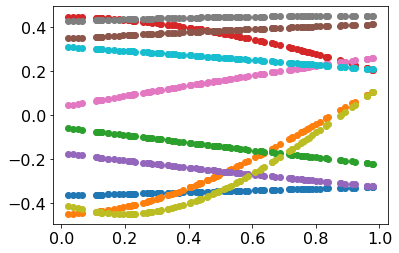

In [453]:
plt.plot(X, PHI_RFF.T, 'o');

In [454]:
bhat_rff = np.linalg.lstsq(PHI_RFF.T, y, rcond=None)[0]

In [455]:
bhat_rff

array([[-1.09745461e+09],
       [ 7.74430554e+05],
       [-1.54871110e+08],
       [-3.36817259e+06],
       [-8.74841462e+08],
       [-1.63332792e+09],
       [-4.10589989e+08],
       [ 5.55274090e+08],
       [-1.91637399e+05],
       [-6.85022112e+08]])

In [456]:
yhat = PHI_RFF.T@bhat_rff

In [457]:
yhat.shape

(100, 1)

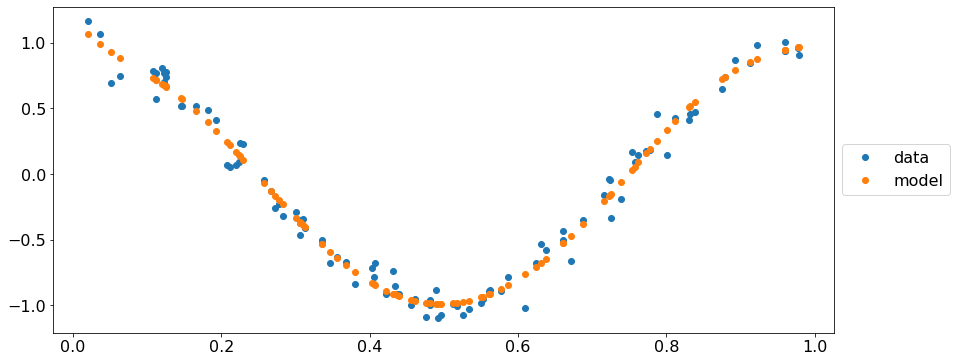

In [458]:
plt.figure(figsize=(14, 6))
plt.plot(X, y, 'o', label='data')
plt.plot(X, yhat, 'o', label='model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# linear regression again

In [459]:
import matplotlib.pyplot as plt
import numpy as np

In [460]:
# GLM - not an LM

# N = 100
# D = 1
# X = np.random.uniform(size=(N, D))

# # some linear relationship
# w0 = 0
# w1 = 1
# w2 = 2
# # y_true = w0*X**0 + w1*X**1 + w2*X**2

# w = np.array([w0, w1, w2])[:, np.newaxis]
# phi = np.column_stack((X**0, X**1, X**2))

# y_true = phi @ w

# noise_var = 0.1
# noise_sd = np.sqrt(noise_var)
# noise = np.random.normal(0, noise_sd, size=(N, D))

# y = y_true + noise

$$
f(x) = \mathbf{X}^{T} \mathbf{w}
$$

In [461]:
# linear model
N = 100
D_in = 1
D_out = 1

# X: column vector
# w: column vector
# y: column vector / scaler in this case

# random grid
X = np.random.uniform(size=(D_in, N))

# uniform grid
# xx = np.linspace(0,1,int(np.sqrt(N)))
# XX, YY = np.meshgrid(xx, xx)
# XX=XX.ravel()
# YY=YY.ravel()
# X = np.row_stack((XX, YY))


# some linear relationship
# w = np.array([[1], [2]])
w = np.random.uniform(size=(D_in, D_out))
y_true = X.T @ w

noise_var = 0.01
noise_sd = np.sqrt(noise_var)
noise = np.random.normal(0, noise_sd, size=(N, D_out))

y = y_true + noise

In [462]:
X.shape

(1, 100)

In [463]:
w.shape

(1, 1)

In [464]:
y_true.shape

(100, 1)

In [465]:
w

array([[0.06686993]])

In [466]:
# estiamte of noise variance
np.sum((y-y_true)**2) / (len(y))

0.011619655499619191

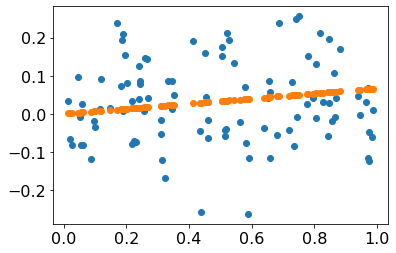

In [467]:
plt.plot(X[0], y, 'o')
plt.plot(X[0], y_true, 'o')

In [468]:
if D_in > 1:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[0], X[1], y)
    ax.scatter(X[0], X[1], y_true)

In [469]:
if D_in > 1:
    plt.plot(X[0], y, 'o')
    plt.plot(X[0], y_true, 'o')

In [470]:
if D_in > 1:
    plt.plot(X[1], y, 'o')
    plt.plot(X[1], y_true, 'o')